# Computing TS maps with gammapy

This notebook show how to compute a TS map for prepared Fermi data of the Galactic plane.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.convolution import Gaussian2DKernel
from astropy.wcs import WCS
from gammapy.detect import compute_ts_map

In [2]:
# Load data from files
maps = fits.open('../datasets/fermi_survey/all.fits.gz')

# Compute a source kernel (source template) in oversample mode,
# PSF is not taken into account
kernel = Gaussian2DKernel(2.5, mode='oversample')

# Compute a TS map. 'On' is the raw counts map, 'Background' is the background model,
# 'ExpGammaMap' denotes to the exposure map.
result = compute_ts_map(maps['On'].data, maps['Background'].data,
                        maps['ExpGammaMap'].data, kernel)
print('TS map computation took {0:.2f} s'.format(result.runtime))

TS map computation took 31.13 s


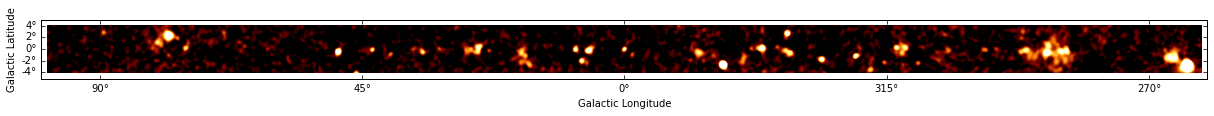

In [3]:
# Plot sqrt(TS) map
fig_ts = plt.figure(figsize=(18, 4))
ax_ts = fig_ts.add_axes([0.1, 0.1, 0.9, 0.9], projection=WCS(maps['On'].header))
ax_ts.imshow(result.sqrt_ts, cmap='afmhot', origin='lower', vmin=0, vmax=10)
ax_ts.coords['glon'].set_axislabel('Galactic Longitude')
ax_ts.coords['glat'].set_axislabel('Galactic Latitude')

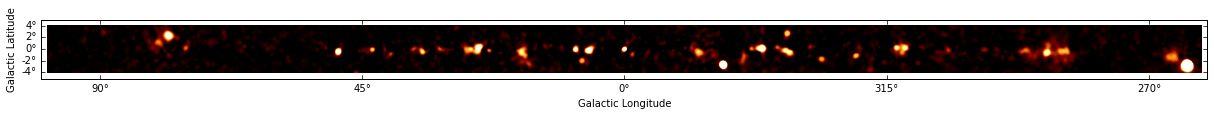

In [4]:
# Plot flux map (in units of m^-2 s^-1 TeV^-1)
fig_flux = plt.figure(figsize=(18, 4))
ax_flux = fig_flux.add_axes([0.1, 0.1, 0.9, 0.9], projection=WCS(maps['On'].header))
ax_flux.imshow(result.amplitude, cmap='afmhot', origin='lower', vmin=0, vmax=1E-9)
ax_flux.coords['glon'].set_axislabel('Galactic Longitude')
ax_flux.coords['glat'].set_axislabel('Galactic Latitude')

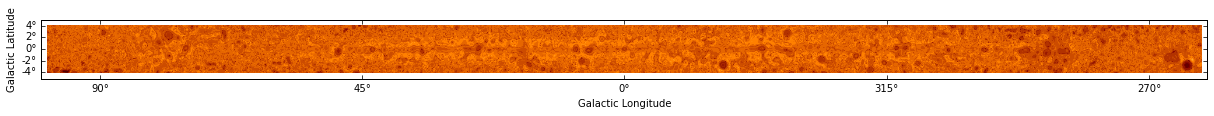

In [5]:
# Plot number of iterations of the fit per pixel
fig_iter = plt.figure(figsize=(18, 4))
ax_iter = fig_iter.add_axes([0.1, 0.1, 0.9, 0.9], projection=WCS(maps['On'].header))
ax_iter.imshow(result.niter, cmap='afmhot', origin='lower', vmin=0, vmax=20)
ax_iter.coords['glon'].set_axislabel('Galactic Longitude')
ax_iter.coords['glat'].set_axislabel('Galactic Latitude')